# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [2]:
from typing import List, Iterable
import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [3]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [4]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean()
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return 2 * np.dot(X.T, np.dot(X, w) - y) / X.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [5]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [6]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
      w = w - lr * loss.calc_grad(X, y, w)
      w_list.append(w.copy())
    w_list = np.array(w_list)
    return w_list

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [7]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [8]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [9]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

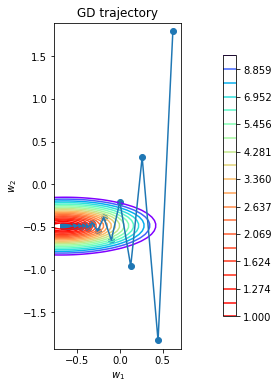

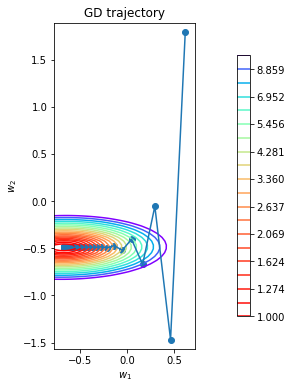

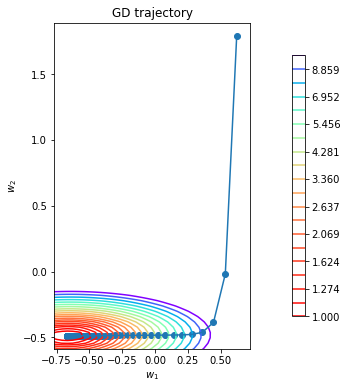

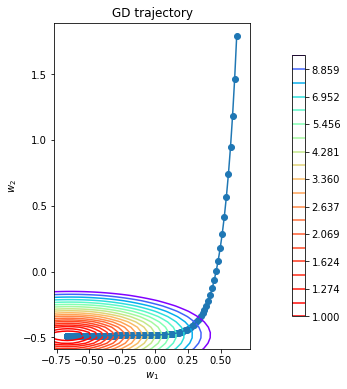

In [10]:
lr = [0.01, 0.009, 0.005, 0.0009]
for i in lr:
  a = gradient_descent(w_init, X, y, loss, lr = i)
  plot_gd(a, X, y, loss)

Чем меньше длина шага, тем "аккуратнее" шагает модель и траектория более сглаженная.


Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
      sample = np.random.choice(X.shape[0], size=batch_size, replace=False)
      w -= lr * loss.calc_grad(X[sample], y[sample], w)
      w_list.append(w.copy())
    return w_list

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

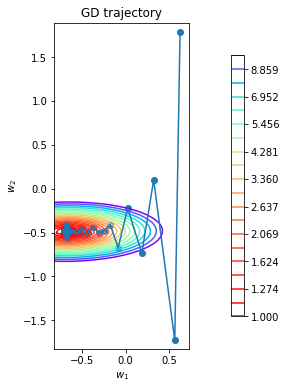

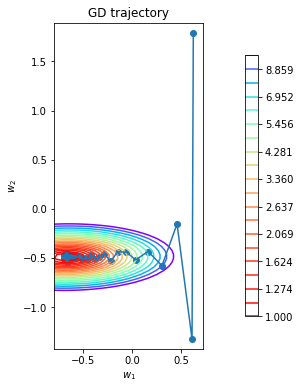

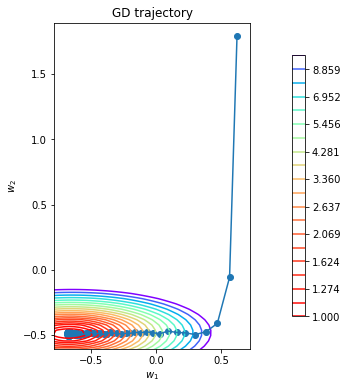

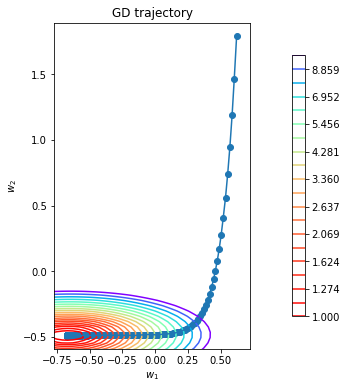

In [12]:
for i, j in zip([0.01, 0.009, 0.005, 0.0009], [50, 100, 150, 250]):
  np.random.seed(42)
  plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr = i, batch_size = j), X, y, loss)

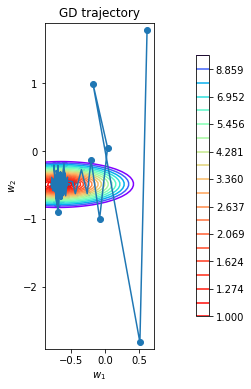

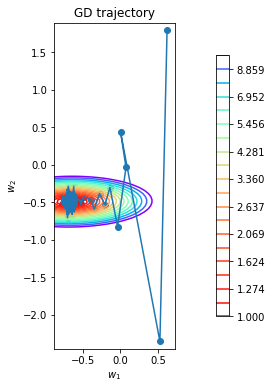

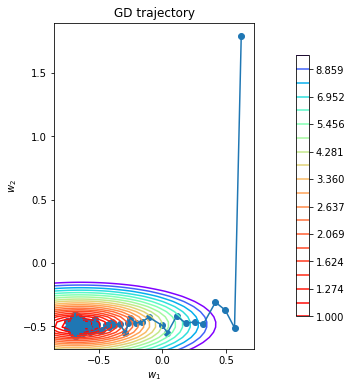

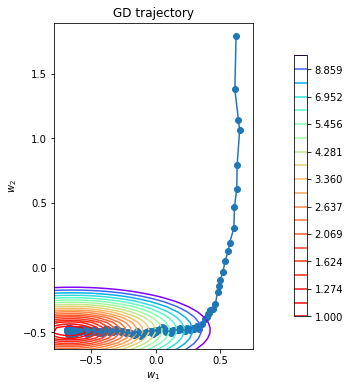

In [13]:
for i in [0.01, 0.009, 0.005, 0.0009]:
  np.random.seed(42)
  plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr = i, batch_size = 10), X, y, loss)

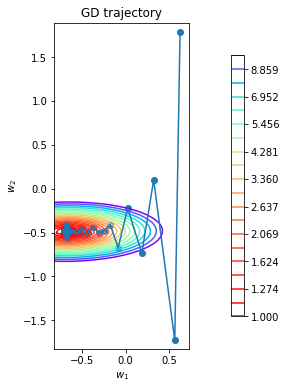

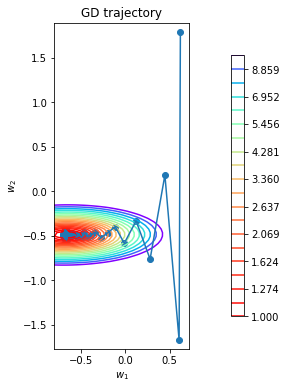

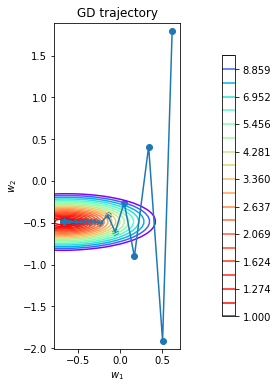

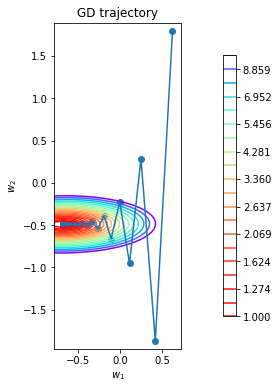

In [14]:
for j in [50, 100, 150, 250]:
  np.random.seed(42)
  plot_gd(stochastic_gradient_descent(w_init, X, y, loss, batch_size = j, lr = 0.01), X, y, loss)

Вывод: чем меньше шаг и больше размер подвыборки batch_size, тем меньше "штормит" модель. По сравнению с обычным градиентом, с одной стороны, мы упрощаем задачу рассчета градиентного спуска сужением размера выборки (ускоряемся), с другой стороны, сталкиваемся с проблемой поиска минимума, потому что ближе к минимуму возникают сильные колебания.


Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [15]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
      sample = np.random.choice(X.shape[0], size=batch_size, replace=False)
      w -= lr * ((1 / (1 + i)) ** p) * loss.calc_grad(X[sample], y[sample], w)
      w_list.append(w.copy())
    return w_list

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

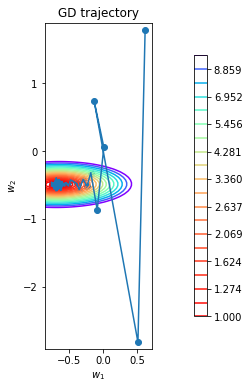

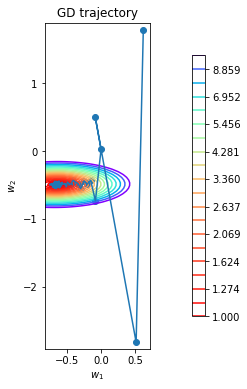

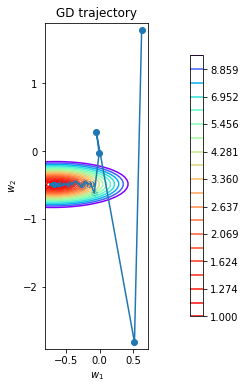

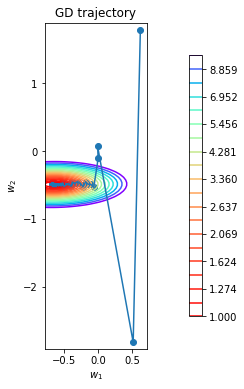

In [16]:
for i in [0.1, 0.2, 0.3, 0.4]:
  np.random.seed(42)
  plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p = i), X, y, loss)

Чем больше значение p, тем меньше длина шага с увеличением числа итераций => шаги более "аккуратные", траектория более сглаженная и плавная (меньше шанс перепрыгнуть минимум).

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [17]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
      sample = np.random.choice(X.shape[0], size=batch_size, replace=False)
      w -= lr * loss.calc_grad(X[sample], y[sample], w)
      w_list.append(w.copy())
    return w_list

In [18]:
np.random.seed(42)
w_list = gradient_descent(w_init, X, y, loss, 0.01, 1000)
w_list_1 = a = stochastic_gradient_descent(w_init, X, y, loss, lr = 0.01, batch_size = 10, n_iterations=1000)
w_gd = w_list.copy()
w_sgd = w_list_1.copy()
residuals_gd = []
residuals_sgd = []


for i in range(1001):
    residuals_gd.append(loss.calc_loss(X, y, w_gd[i]))
    residuals_sgd.append(loss.calc_loss(X, y, w_sgd[i]))

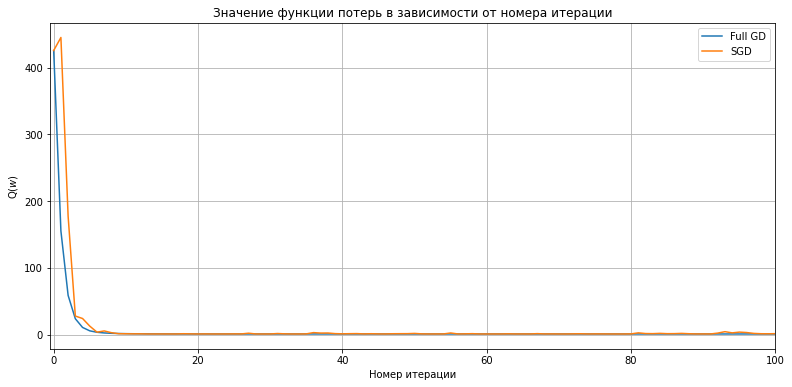

In [19]:
plt.figure(figsize=(13, 6))
plt.plot(range(1001), residuals_gd, label='Full GD')
plt.plot(range(1001), residuals_sgd, label='SGD')

plt.title('Значение функции потерь в зависимости от номера итерации')
plt.xlim((-0.5, 100))
plt.legend()
plt.xlabel('Номер итерации')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()

Стохастический градиентный спуск действительно ведет себя нестабильно, особенно при первых итерациях, выдавая на некоторых участках скачки значений ошибки, также SGD убывает чуть медленнее, чем GD, при достижении минимальных значений.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [20]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        weights = np.arange(X.shape[1])
        self.w = gradient_descent(weights, X, y, self.loss, 0.01, 100)

        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.y_predict = np.dot(X, self.w[-1])
        return self.y_predict

        # -- YOUR CODE HERE --

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [21]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [37]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()]

In [38]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
X_raw

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [39]:
from sklearn.model_selection import train_test_split
np.random.seed(15)

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3)

In [40]:
np.isnan(y).any()

False

In [41]:
X_train.isnull().values.any()

True

In [42]:
X_test.isnull().values.any()

True

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
cat_features_mask = (X_train.dtypes == "object").values
cat_features_mask_2 = (X_test.dtypes == "object").values

In [45]:
X_train_nobj = X_train[X_train.columns[~cat_features_mask]]
X_test_nobj = X_test[X_test.columns[~cat_features_mask_2]]
mis_replacer = SimpleImputer(strategy="mean")
X_train_left = pd.DataFrame(data=mis_replacer.fit_transform(X_train_nobj), columns=X_train_nobj.columns)
X_test_left = pd.DataFrame(data=mis_replacer.transform(X_test_nobj), columns=X_test_nobj.columns)

In [46]:
X_train_obj = X_train[X_train.columns[cat_features_mask]]
X_test_obj = X_test[X_test.columns[cat_features_mask_2]]
mis_replacer = SimpleImputer(strategy="most_frequent")
X_train_right = pd.DataFrame(data=mis_replacer.fit_transform(X_train_obj), columns=X_train_obj.columns)
X_test_right = pd.DataFrame(data=mis_replacer.transform(X_test_obj), columns=X_test_obj.columns)

In [47]:
from sklearn.preprocessing import StandardScaler    

sc = StandardScaler()
X_train_scaled = pd.DataFrame(data=sc.fit_transform(X_train_left), columns=X_train_left.columns)
X_test_scaled = pd.DataFrame(data=sc.transform(X_test_left), columns=X_test_left.columns)

In [48]:
X_train_final = pd.concat([X_train_scaled, X_train_right], axis=1)
X_train_final

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,0.034054,-0.230617,-0.835916,-1.441072,-1.023979,-1.186384,-1.358006,-0.924552,-1.423252,-0.100803,...,dodge,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
1,-1.555112,-1.904956,0.567842,0.054160,0.234357,0.558388,-0.505259,-0.188459,-0.124876,0.825842,...,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
2,-0.760529,-0.736077,-0.271186,-0.239984,-0.278299,-0.462942,-0.848253,-0.510500,1.058937,-1.864418,...,subaru,gas,std,four,sedan,fwd,front,ohcf,four,2bbl
3,0.828636,-0.988808,-0.255051,-0.264496,-0.231694,0.898831,-0.721288,-0.487497,-0.583126,0.407357,...,volkswagen,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,-0.760529,1.980775,0.374220,0.152208,-0.557929,0.303055,0.222418,0.777662,-0.124876,-0.220370,...,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.623219,0.780305,0.035382,0.952933,0.234357,1.069053,0.123878,-0.211462,0.753437,-0.579071,...,saab,gas,std,two,hatchback,fwd,front,ohc,four,mpfi
136,0.034054,0.906670,-0.835916,-0.624005,-1.023979,-1.186384,-0.761083,-0.740529,-1.423252,-0.100803,...,plymouth,gas,std,four,sedan,fwd,front,ohc,four,2bbl
137,0.828636,-0.672895,0.035382,0.952933,0.234357,1.069053,0.482032,-0.211462,0.753437,-0.579071,...,saab,gas,turbo,four,sedan,fwd,front,dohc,four,mpfi
138,-0.760529,-0.736077,-0.303456,-0.239984,-0.278299,0.303055,-0.393455,-0.510500,1.058937,-1.864418,...,subaru,gas,std,four,sedan,4wd,front,ohcf,four,2bbl


In [49]:
X_test_final = pd.concat([X_test_scaled, X_test_right], axis=1)
X_test_final

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,0.034054,-6.728947e-01,-0.932727,-1.294000,-0.837559,0.217944,-1.303051,-0.901549,-1.194127,-0.339937,...,mazda,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
1,-1.555112,-1.620634e+00,0.874410,1.132688,0.560592,1.664828,0.836396,0.248596,1.669938,-0.339937,...,volvo,gas,std,four,wagon,rwd,front,ohc,four,mpfi
2,-0.760529,1.980775e+00,0.374220,0.152208,-0.557929,0.303055,0.326643,0.777662,-0.124876,-0.220370,...,bmw,gas,std,four,sedan,rwd,front,ohc,six,mpfi
3,-1.555112,-1.904956e+00,0.567842,0.054160,0.234357,0.558388,-0.338500,-0.188459,-0.124876,0.825842,...,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,0.828636,8.978788e-16,-0.448673,0.152208,0.280962,-1.314050,-0.251330,0.041570,0.447937,1.901946,...,renault,gas,std,two,hatchback,fwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.034054,-7.676687e-01,-0.835916,-2.037531,-0.930769,-0.420387,-1.431911,-1.177584,-1.652377,-0.579071,...,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
57,0.828636,1.127810e+00,-0.835916,-1.441072,-0.744349,-1.186384,-1.229147,-0.878546,-1.423252,-0.100803,...,mitsubishi,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
58,-1.555112,-1.115173e+00,0.906680,1.050981,0.234357,0.217944,1.020210,0.938682,-0.277626,0.257898,...,toyota,gas,std,four,sedan,rwd,front,dohc,six,mpfi
59,-0.760529,-1.273129e+00,-0.319591,-0.109253,-0.278299,0.558388,-0.327130,-0.510500,1.058937,-1.864418,...,subaru,gas,std,four,wagon,4wd,front,ohcf,four,2bbl


In [50]:
X_train_final.isnull().any().any()

False

In [51]:
X_test_final.isnull().any().any()

False

In [52]:
X_final = pd.concat([X_train_final, X_test_final], axis=0)
X_final

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,0.034054,-0.230617,-0.835916,-1.441072,-1.023979,-1.186384,-1.358006,-0.924552,-1.423252,-0.100803,...,dodge,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
1,-1.555112,-1.904956,0.567842,0.054160,0.234357,0.558388,-0.505259,-0.188459,-0.124876,0.825842,...,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
2,-0.760529,-0.736077,-0.271186,-0.239984,-0.278299,-0.462942,-0.848253,-0.510500,1.058937,-1.864418,...,subaru,gas,std,four,sedan,fwd,front,ohcf,four,2bbl
3,0.828636,-0.988808,-0.255051,-0.264496,-0.231694,0.898831,-0.721288,-0.487497,-0.583126,0.407357,...,volkswagen,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,-0.760529,1.980775,0.374220,0.152208,-0.557929,0.303055,0.222418,0.777662,-0.124876,-0.220370,...,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.034054,-0.767669,-0.835916,-2.037531,-0.930769,-0.420387,-1.431911,-1.177584,-1.652377,-0.579071,...,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
57,0.828636,1.127810,-0.835916,-1.441072,-0.744349,-1.186384,-1.229147,-0.878546,-1.423252,-0.100803,...,mitsubishi,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
58,-1.555112,-1.115173,0.906680,1.050981,0.234357,0.217944,1.020210,0.938682,-0.277626,0.257898,...,toyota,gas,std,four,sedan,rwd,front,dohc,six,mpfi
59,-0.760529,-1.273129,-0.319591,-0.109253,-0.278299,0.558388,-0.327130,-0.510500,1.058937,-1.864418,...,subaru,gas,std,four,wagon,4wd,front,ohcf,four,2bbl


In [53]:
X = pd.get_dummies(X_final, drop_first=True)
print(X.shape)
X

(201, 64)


,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0.034054,-0.230617,-0.835916,-1.441072,-1.023979,-1.186384,-1.358006,-0.924552,-1.423252,-0.100803,...,0,0,0,1,0,0,0,0,0,0
1,-1.555112,-1.904956,0.567842,0.054160,0.234357,0.558388,-0.505259,-0.188459,-0.124876,0.825842,...,0,0,0,0,0,0,0,1,0,0
2,-0.760529,-0.736077,-0.271186,-0.239984,-0.278299,-0.462942,-0.848253,-0.510500,1.058937,-1.864418,...,0,0,0,1,0,0,0,0,0,0
3,0.828636,-0.988808,-0.255051,-0.264496,-0.231694,0.898831,-0.721288,-0.487497,-0.583126,0.407357,...,0,0,0,0,0,0,0,1,0,0
4,-0.760529,1.980775,0.374220,0.152208,-0.557929,0.303055,0.222418,0.777662,-0.124876,-0.220370,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.034054,-0.767669,-0.835916,-2.037531,-0.930769,-0.420387,-1.431911,-1.177584,-1.652377,-0.579071,...,0,0,0,0,0,0,0,0,0,0
57,0.828636,1.127810,-0.835916,-1.441072,-0.744349,-1.186384,-1.229147,-0.878546,-1.423252,-0.100803,...,0,0,0,1,0,0,0,0,0,0
58,-1.555112,-1.115173,0.906680,1.050981,0.234357,0.217944,1.020210,0.938682,-0.277626,0.257898,...,0,0,0,0,0,0,0,1,0,0
59,-0.760529,-1.273129,-0.319591,-0.109253,-0.278299,0.558388,-0.327130,-0.510500,1.058937,-1.864418,...,0,0,0,1,0,0,0,0,0,0


In [54]:
X_train = X[0:140]
X_test = X[140:201]

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [55]:
lr = linear_regression.fit(X_train,y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [56]:
from sklearn.metrics import mean_squared_error

print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test))))

Train: 11143641.466141472
Test: 8989202.721722461


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [57]:
from scipy.linalg import norm

In [58]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --

        return np.square(X.dot(w) - y).mean() + self.coef * (norm(w[:-1])**2)
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        w_new = w[:-1]

        w_new = np.append(w_new, np.array([0]))
        
        return 2 * np.dot(X.T, np.dot(X, w) - y) / X.shape[0] + 2 * self.coef * w_new

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [59]:
from sklearn.metrics import mean_squared_error

In [712]:
errors = []
a = np.linspace(0.01, 100, 10000)
for i in a:
  linear_regression_2 = LinearRegression(MSEL2Loss(i))
  lr_2 = linear_regression_2.fit(X_train,y_train)
  errors.append(mean_squared_error(y_test, lr_2.predict(X_test)))
a[errors.index(min(errors))]

0.19

In [60]:
linear_regression_2 = LinearRegression(MSEL2Loss(0.19))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [61]:
lr_2 = linear_regression_2.fit(X_train,y_train)

In [62]:
from sklearn.metrics import mean_squared_error

print ("Train: {}".format(mean_squared_error(y_train, lr_2.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lr_2.predict(X_test))))

Train: 12304425.438154973
Test: 8836115.430773808


В регрессии c регуляризацией ошибка на трейне выше, а на тесте -  меньше: в действительности, такое возможно, так как модель с регуляризацией штрафует за большие веса сильнее, предотвращая переобучение.



В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [63]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        error = np.dot(X, w) - y
        mse = (error ** 2) / 2
        mae = self.eps * (abs(error) - 0.5 * self.eps)
        mask = np.abs(error) < self.eps
        return np.mean(np.where(mask, mse, mae))
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        error = np.dot(X, w) - y
        f_1 = error
        f_2 = self.eps * (error / np.abs(error))
        mask_1 = np.abs(error) < self.eps
        return np.dot(X.T, np.where(mask_1, f_1, f_2)) / X.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
error = []
a = np.linspace(1, 100000, 10000)
for i in a:
  linear_regression_3 = LinearRegression(HuberLoss(i))
  lr_3 = linear_regression_3.fit(X_train,y_train)
  error.append(mean_squared_error(y_test, lr_3.predict(X_test)))
a[error.index(min(error))]

40604.654365436545

In [64]:
linear_regression_3 = LinearRegression(HuberLoss(40604.654365436545))

In [65]:
lr_3 = linear_regression_3.fit(X_train,y_train)

In [66]:
from sklearn.metrics import mean_squared_error

print ("Train: {}".format(mean_squared_error(y_train, lr_3.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lr_3.predict(X_test))))

Train: 15140367.749956049
Test: 10489151.069955682


Ошибка и на трейне, и на тесте  увеличилась: возможно, это связано с тем, что Хубер Лосс меньше штрафует за большие выбросы.





**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [ ]:
# -- YOUR MEME HERE --
# выбрать любимый мем за год - непосильная задача, зато прикрепляю ссылочку на Соколова с лекции, показывающего козу: https://drive.google.com/file/d/1qYxwNd1MOCFvIM0186Dt-IKMlecqOjDP/view?usp=sharing

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [67]:
# тут я просто занимаюсь чем-то, непонятно чем 
def zhgy(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
      w += np.random.standard_t(3, size=w.shape)
      w_list.append(w.copy())
    return w_list

In [68]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        weights = np.arange(X.shape[1])
        self.w = gradient_descent(weights, X, y, self.loss, 0.01, 1000)

        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.y_predict = np.dot(X, self.w[-1])
        return self.y_predict


In [69]:
linear_regression_4 = LinearRegression(MSELoss())

In [70]:
lr_4 = linear_regression_4.fit(X_train_scaled,y_train)

In [71]:
from sklearn.metrics import mean_squared_error

print ("Train: {}".format(mean_squared_error(y_train, lr_4.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, lr_4.predict(X_test_scaled))))

Train: 11095854.587065898
Test: 6726913.82988905


In [72]:
linear_regression_5 = LinearRegression(MSEL2Loss(0.01))

In [73]:
lr_5 = linear_regression_5.fit(X_train_scaled,y_train)

In [74]:
from sklearn.metrics import mean_squared_error

print ("Train: {}".format(mean_squared_error(y_train, lr_5.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, lr_5.predict(X_test_scaled))))

Train: 11119298.860425357
Test: 6757845.139305514


Ошибки на теста в алгоритме отжига меньше, чем при градиентом спуске.